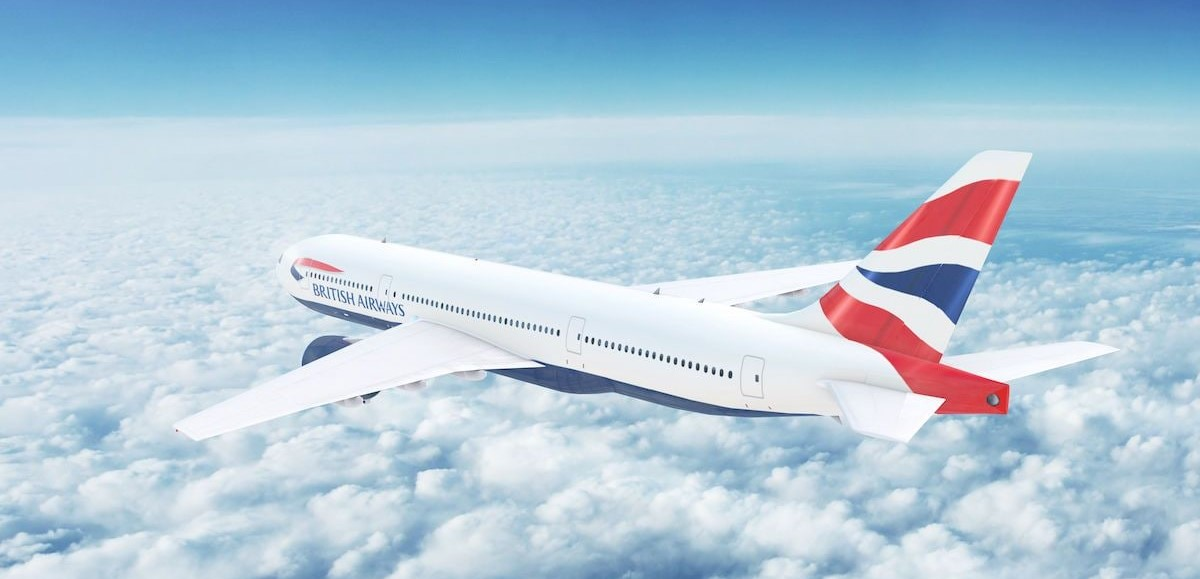

### <span style='color:#20345a'>Import libraries</span>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from colorama import Fore
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score, mean_absolute_error
from math import sqrt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as metrics
import warnings
warnings.simplefilter("ignore")

### <span style='color:#20345a'>Reading the file</span>

Airline : The name of the airline

Date_of_Journey : The date of the journey

Source : The source from which the service begins

Destination : The destination where the service ends

Route : The route taken by the flight to reach the destination

Dep_Time : The time when the journey starts from the source

Arrival_Time : Time of arrival at the destination

Duration : Total duration of the flight

Total_Stops : Total stops between the source and destination

Additional_Info : Additional information about the flight

Price : The price of the ticket

### <span style='color:#20345a'>Reading the file</span>

In [2]:
df = pd.read_csv('Train set.csv')
df1 = pd.read_csv('Test set.csv')
df.head()
#df for the train dataset
#df1 for the test dataset

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,9/06/2019,Kolkata,Banglore,CCU → BLR,14:25,16:55,2h 30m,non-stop,No info,5644
1,Vistara,6/03/2019,Mumbai,Hyderabad,BOM → DEL → HYD,08:45,09:25 07 Mar,24h 40m,1 stop,No info,12395
2,IndiGo,3/04/2019,Banglore,Delhi,BLR → DEL,06:05,08:50,2h 45m,non-stop,No info,4077
3,Vistara,12/06/2019,Kolkata,Banglore,CCU → DEL → BLR,17:00,23:25,6h 25m,1 stop,No info,8610
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → DEL,10:05,13:00,2h 55m,non-stop,No info,10067


### <span style='color:#20345a'>Data Information</span>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8012 entries, 0 to 8011
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          8012 non-null   object
 1   Date_of_Journey  8012 non-null   object
 2   Source           8012 non-null   object
 3   Destination      8012 non-null   object
 4   Route            8011 non-null   object
 5   Dep_Time         8012 non-null   object
 6   Arrival_Time     8012 non-null   object
 7   Duration         8012 non-null   object
 8   Total_Stops      8011 non-null   object
 9   Additional_Info  8012 non-null   object
 10  Price            8012 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 688.7+ KB


In [4]:
#Fore.LIGHTCYAN_EX for output color 
print(Fore.LIGHTCYAN_EX , df.shape)

 (8012, 11)


In [5]:
df.describe()

,Price
count,8012.000000
mean,9094.237269
std,4571.794408
min,1759.000000
25%,5351.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


find duplicated

In [6]:
df.duplicated().any()

True

In [7]:
print(Fore.LIGHTCYAN_EX,'There are "{}" duplicate values in my data'.format(df.duplicated().sum()))

 There are "125" duplicate values in my data


In [8]:
df[df.duplicated(keep=False)].sort_values(['Airline', 'Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time']).head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
1294,Air India,01/03/2019,Banglore,New Delhi,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,39h 5m,2 stops,No info,17135
3679,Air India,01/03/2019,Banglore,New Delhi,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,39h 5m,2 stops,No info,17135
537,Air India,1/04/2019,Kolkata,Banglore,CCU → DEL → COK → BLR,10:00,01:20 02 Apr,15h 20m,2 stops,No info,10408
5347,Air India,1/04/2019,Kolkata,Banglore,CCU → DEL → COK → BLR,10:00,01:20 02 Apr,15h 20m,2 stops,No info,10408
2242,Air India,1/05/2019,Kolkata,Banglore,CCU → DEL → COK → BLR,10:00,13:45 02 May,27h 45m,2 stops,No info,15164


In [9]:
df = df.drop_duplicates()

In [10]:
df[df.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [11]:
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)
df1.reset_index(inplace=True)
df1.drop('index', axis=1, inplace=True)

In [12]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [13]:
df1.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [14]:
df[df['Total_Stops'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
6786,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [15]:
df1[df1['Total_Stops'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info


In [16]:
filt = (df['Airline'] == 'Air India') & (df['Source'] == 'Delhi') & (df['Destination'] == 'Cochin') & (df['Duration'] == '23h 40m') & (df['Price'] == 7480) 
df[filt]
#the  flights shares the most features together
#so i imputed the null values with the features as other flights

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
1471,Air India,27/06/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 28 Jun,23h 40m,1 stop,No info,7480
1735,Air India,15/05/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 16 May,23h 40m,1 stop,No info,7480
4379,Air India,24/05/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 25 May,23h 40m,1 stop,No info,7480
4846,Air India,12/06/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 13 Jun,23h 40m,1 stop,No info,7480
6786,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [17]:
df.loc[6786,['Route', 'Total_Stops']]=df.loc[4379,['Route', 'Total_Stops']]

In [18]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [19]:
df1['Additional_Info'].value_counts()


No info                         2105
In-flight meal not included      491
No check-in baggage included      69
Business class                     2
Change airports                    2
1 Long layover                     2
Name: Additional_Info, dtype: int64

In [20]:
df['Additional_Info'].value_counts()

No info                         6153
In-flight meal not included     1455
No check-in baggage included     249
1 Long layover                    17
Change airports                    5
No Info                            3
Business class                     2
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [21]:
df["Additional_Info"] = df["Additional_Info"].replace({'No Info': 'No info'})

In [22]:
df['Journey_day'] = pd.to_datetime(df['Date_of_Journey']).dt.day
df['Journey_month'] = pd.to_datetime(df['Date_of_Journey']).dt.month
#----------------------------------------------------------------------------
df1['Journey_day'] = pd.to_datetime(df1['Date_of_Journey']).dt.day
df1['Journey_month'] = pd.to_datetime(df1['Date_of_Journey']).dt.month

In [23]:
df['Dep_Time_hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_Time_minute'] = pd.to_datetime(df['Dep_Time']).dt.minute
#----------------------------------------------------------------------------
df1['Dep_Time_hour'] = pd.to_datetime(df1['Dep_Time']).dt.hour
df1['Dep_Time_minute'] = pd.to_datetime(df1['Dep_Time']).dt.minute

In [24]:
df['Dep_Time_hour'] = pd.to_numeric(df['Dep_Time_hour'])
df['Dep_Time_minute'] = pd.to_numeric(df['Dep_Time_minute'])
#----------------------------------------------------------------------------
df1['Dep_Time_hour'] = pd.to_numeric(df1['Dep_Time_hour'])
df1['Dep_Time_minute'] = pd.to_numeric(df1['Dep_Time_minute'])

In [25]:
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])
df['Arrival_Time_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_Time_minute'] = pd.to_datetime(df['Arrival_Time']).dt.minute
df['Arrival_Time_hour'] = pd.to_numeric(df['Arrival_Time_hour'])
df['Arrival_Time_minute'] = pd.to_numeric(df['Arrival_Time_minute'])
#----------------------------------------------------------------------------
df1['Arrival_Time'] = pd.to_datetime(df1['Arrival_Time'])
df1['Arrival_Time_hour'] = pd.to_datetime(df1['Arrival_Time']).dt.hour
df1['Arrival_Time_minute'] = pd.to_datetime(df1['Arrival_Time']).dt.minute
df1['Arrival_Time_hour'] = pd.to_numeric(df1['Arrival_Time_hour'])
df1['Arrival_Time_minute'] = pd.to_numeric(df1['Arrival_Time_minute'])

In [26]:
df.drop(['Dep_Time', 'Arrival_Time','Date_of_Journey'], axis=1, inplace=True)
df1.drop(['Dep_Time', 'Arrival_Time','Date_of_Journey'], axis=1, inplace=True)

In [27]:
j=0
for time in df['Duration']:
    if 'm' not in time:
        j+=1
print(j, 'time not found')
print('---------------------------')
j=0
for time in df1['Duration']:
    if 'm' not in time:
        j+=1
print(j, 'time not found')

757 time not found
---------------------------
258 time not found


In [28]:
for time in df['Duration']:
    if 'h' not in time:
        print('not found',time)
print('---------------------------')       
for time in df1['Duration']:
    if 'h' not in time:
        print('not found',time)

not found 5m
---------------------------


In [29]:
df[df['Duration']=='5m']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
3653,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2 stops,No info,17327,3,6,16,50,16,55


In [30]:
#we found that there is a flight with duration of 5 minutes
#this make no sense so we dropped it
df.drop(index=3653, inplace=True)

In [31]:
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)

In [32]:
for i in range(len(df['Duration'])):
    list_val = df.loc[i,"Duration"].split()
    df.loc[i,'Duration_hour']=list_val[0]
    if len(list_val)==2:
        df.loc[i,'Duration_minute']=list_val[1]
        
print('---------------------------')  

for i in range(len(df1['Duration'])):
    list_val = df1.loc[i,"Duration"].split()
    df1.loc[i,'Duration_hour']=list_val[0]
    if len(list_val)==2:
        df1.loc[i,'Duration_minute']=list_val[1]

---------------------------


In [33]:
df.isna().sum()

Airline                  0
Source                   0
Destination              0
Route                    0
Duration                 0
Total_Stops              0
Additional_Info          0
Price                    0
Journey_day              0
Journey_month            0
Dep_Time_hour            0
Dep_Time_minute          0
Arrival_Time_hour        0
Arrival_Time_minute      0
Duration_hour            0
Duration_minute        757
dtype: int64

In [34]:
df1.isna().sum()

Airline                  0
Source                   0
Destination              0
Route                    0
Duration                 0
Total_Stops              0
Additional_Info          0
Journey_day              0
Journey_month            0
Dep_Time_hour            0
Dep_Time_minute          0
Arrival_Time_hour        0
Arrival_Time_minute      0
Duration_hour            0
Duration_minute        258
dtype: int64

In [35]:
df.fillna('0m', inplace=True)
df1.fillna('0m', inplace=True)

In [36]:
df['Duration_hour'] = [x.replace('h','') for x in df['Duration_hour']]
df['Duration_minute'] = [x.replace('m','') for x in df['Duration_minute']]
df['Duration_hour'] = pd.to_numeric(df['Duration_hour'])
df['Duration_minute'] = pd.to_numeric(df['Duration_minute'])
#-------------------------------------------------------------------------
df1['Duration_hour'] = [x.replace('h','') for x in df1['Duration_hour']]
df1['Duration_minute'] = [x.replace('m','') for x in df1['Duration_minute']]
df1['Duration_hour'] = pd.to_numeric(df1['Duration_hour'])
df1['Duration_minute'] = pd.to_numeric(df1['Duration_minute'])

In [37]:
for i in range(len(df['Duration_hour'])):
    df.loc[i,'Duration_total'] = int(df.loc[i,'Duration_hour']*60) + float((df.loc[i,'Duration_minute']))

#-----------------------------------------------

for i in range(len(df1['Duration_hour'])):
    df1.loc[i,'Duration_total'] = int(df1.loc[i,'Duration_hour']*60) + float((df1.loc[i,'Duration_minute']))

In [38]:
stops_replacement = {'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}
df['Total_Stops'].replace(stops_replacement, inplace=True)

#----------------------------------------------------------------------------------

df1['Total_Stops'].replace(stops_replacement, inplace=True)

In [39]:
df['Airline'].value_counts()

Jet Airways                          2797
IndiGo                               1529
Air India                            1271
Multiple carriers                     917
SpiceJet                              606
Vistara                               352
Air Asia                              247
GoAir                                 152
Multiple carriers Premium economy       8
Jet Airways Business                    3
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [40]:
df1['Airline'].value_counts()

Jet Airways                          967
IndiGo                               519
Air India                            448
Multiple carriers                    279
SpiceJet                             209
Vistara                              127
Air Asia                              72
GoAir                                 42
Multiple carriers Premium economy      5
Jet Airways Business                   3
Name: Airline, dtype: int64

In [41]:
Airline_relacement = {'Multiple carriers Premium economy':'Other', 'Jet Airways Business':'Other','Vistara Premium economy':'Other',
'Trujet':'Other'}
df["Airline"].replace(Airline_relacement, inplace=True)

#-------------------------------

Airline_relacement1 = {'Multiple carriers Premium economy':'Other', 'Jet Airways Business':'Other'}
df1["Airline"].replace(Airline_relacement1, inplace=True)

In [42]:
df['Airline'].value_counts()

Jet Airways          2797
IndiGo               1529
Air India            1271
Multiple carriers     917
SpiceJet              606
Vistara               352
Air Asia              247
GoAir                 152
Other                  15
Name: Airline, dtype: int64

In [43]:
df1['Airline'].value_counts()

Jet Airways          967
IndiGo               519
Air India            448
Multiple carriers    279
SpiceJet             209
Vistara              127
Air Asia              72
GoAir                 42
Other                  8
Name: Airline, dtype: int64

In [44]:
df["Additional_Info"].value_counts()

No info                         6155
In-flight meal not included     1455
No check-in baggage included     249
1 Long layover                    17
Change airports                    5
Business class                     2
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [45]:
df1["Additional_Info"].value_counts()

No info                         2105
In-flight meal not included      491
No check-in baggage included      69
Business class                     2
Change airports                    2
1 Long layover                     2
Name: Additional_Info, dtype: int64

In [46]:
Additional_info_replacement = {'Change airports':'Other', 'Business class':'Other','1 Short layover':'Other','Red-eye flight':'Other',
'2 Long layover':'Other'}
df["Additional_Info"].replace(Additional_info_replacement, inplace=True)

#--------------------------------------------------------------

Additional_info_replacement1 = {'Change airports':'Other', 'Business class':'Other','1 Long layover':'Other'}
df1["Additional_Info"].replace(Additional_info_replacement1, inplace=True)

In [47]:
viz_df = df[["Source","Destination","Additional_Info",'Total_Stops','Route', "Price"]]

In [48]:
viz_df.head()

,Source,Destination,Additional_Info,Total_Stops,Route,Price
0,Kolkata,Banglore,No info,0,CCU → BLR,5644
1,Mumbai,Hyderabad,No info,1,BOM → DEL → HYD,12395
2,Banglore,Delhi,No info,0,BLR → DEL,4077
3,Kolkata,Banglore,No info,1,CCU → DEL → BLR,8610
4,Banglore,New Delhi,No info,0,BLR → DEL,10067


In [49]:
df["Additional_Info"].value_counts()

No info                         6155
In-flight meal not included     1455
No check-in baggage included     249
1 Long layover                    17
Other                             10
Name: Additional_Info, dtype: int64

In [50]:
df1["Additional_Info"].value_counts()

No info                         2105
In-flight meal not included      491
No check-in baggage included      69
Other                              6
Name: Additional_Info, dtype: int64

In [51]:
viz_df = pd.concat([df["Airline"],viz_df], axis=1)

In [52]:
replace_addinfo = {'No info':0, 'In-flight meal not included':1, 'No check-in baggage included':2, '1 Long layover':3, 'Other':4}
replace_airline = {'Jet Airways':0, 'IndiGo':1, 'Air India':2, 'Multiple carriers':3,'SpiceJet':4, 'Vistara':5, 'Air Asia':6, 'GoAir':7, 'Other':8}
replace_place = {'Delhi':0, 'Kolkata':1, 'Banglore':2, 'Mumbai':3, 'Chennai':4, 'Cochin':5, 'New Delhi':6, 'Hyderabad':7}


In [53]:
df["Additional_Info"].replace(replace_addinfo, inplace=True)
df["Airline"].replace(replace_airline, inplace=True)
df["Source"].replace(replace_place, inplace=True)
df["Destination"].replace(replace_place, inplace=True)

In [54]:
df1["Additional_Info"].replace(replace_addinfo, inplace=True)
df1["Airline"].replace(replace_airline, inplace=True)
df1["Source"].replace(replace_place, inplace=True)
df1["Destination"].replace(replace_place, inplace=True)

In [55]:
df.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Duration_total
0,1,1,2,CCU → BLR,2h 30m,0,0,5644,6,9,14,25,16,55,2,30,150.0
1,5,3,7,BOM → DEL → HYD,24h 40m,1,0,12395,3,6,8,45,9,25,24,40,1480.0
2,1,2,0,BLR → DEL,2h 45m,0,0,4077,4,3,6,5,8,50,2,45,165.0


In [56]:
df1.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Duration_total
0,2,1,2,CCU → BOM → COK → BLR,28h 20m,2,0,5,9,9,25,13,45,28,20,1700.0
1,6,2,0,BLR → DEL,2h 45m,0,0,24,5,11,10,13,55,2,45,165.0
2,2,1,2,CCU → BLR,2h 30m,0,0,4,12,14,15,16,45,2,30,150.0


In [57]:
df['Source'].value_counts()

0    3310
1    2167
2    1627
3     509
4     273
Name: Source, dtype: int64

In [58]:
df['Destination'].value_counts()

5    3310
2    2167
0     928
6     699
7     509
1     273
Name: Destination, dtype: int64

---

### <span style='color:#20345a'>Dealing with data</span>
 #### <span style='color:#aa8464'>Exploring this questions:</span>
 - <font color='#5e81ac'>Q1: Does price vary with Airlines?</font> 
 - <font color='#5e81ac'>Q2: How Does the Ticket Price vary with the number of stops of a Flight?</font>
 - <font color='#5e81ac'>Q3: How the Ticket Price change based on the Departure Time and Arrival Time?</font>
 - <font color='#5e81ac'>Q4: How the price changes with change in Source city and Destination city?</font>
 - <font color='#5e81ac'>Q5: what is Total number of routes from one city to another?</font>
 - <font color='#5e81ac'>Q6: what is Average Price of different Airlnes from Source city to Destination city?</font>
 - <font color='#5e81ac'>Q7: Does ticket price change based on the departure time and arrival time?</font>

---

In [59]:
viz_df.head()

,Airline,Source,Destination,Additional_Info,Total_Stops,Route,Price
0,IndiGo,Kolkata,Banglore,No info,0,CCU → BLR,5644
1,Vistara,Mumbai,Hyderabad,No info,1,BOM → DEL → HYD,12395
2,IndiGo,Banglore,Delhi,No info,0,BLR → DEL,4077
3,Vistara,Kolkata,Banglore,No info,1,CCU → DEL → BLR,8610
4,IndiGo,Banglore,New Delhi,No info,0,BLR → DEL,10067


In [60]:
# dealing with Airline:
viz_df['Airline'].unique()

array(['IndiGo', 'Vistara', 'Jet Airways', 'Multiple carriers',
       'Air India', 'GoAir', 'SpiceJet', 'Air Asia', 'Other'],
      dtype=object)

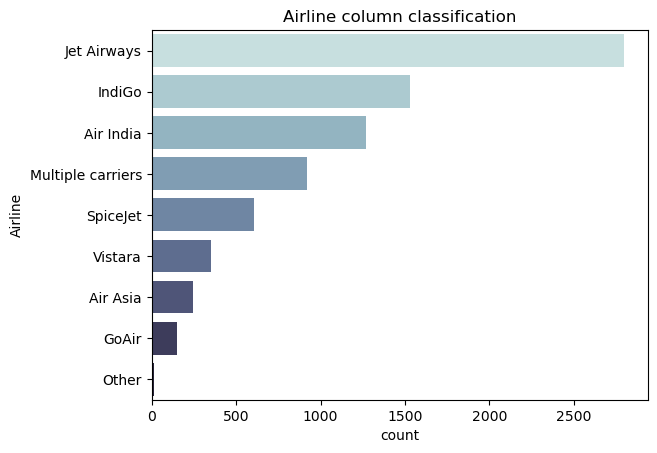

In [61]:
sns.countplot(y = 'Airline', data = viz_df,  
            order = viz_df['Airline'].value_counts().index,
            palette = 'ch:start=.2,rot=-.3')
plt.title('Airline column classification')
plt.show()

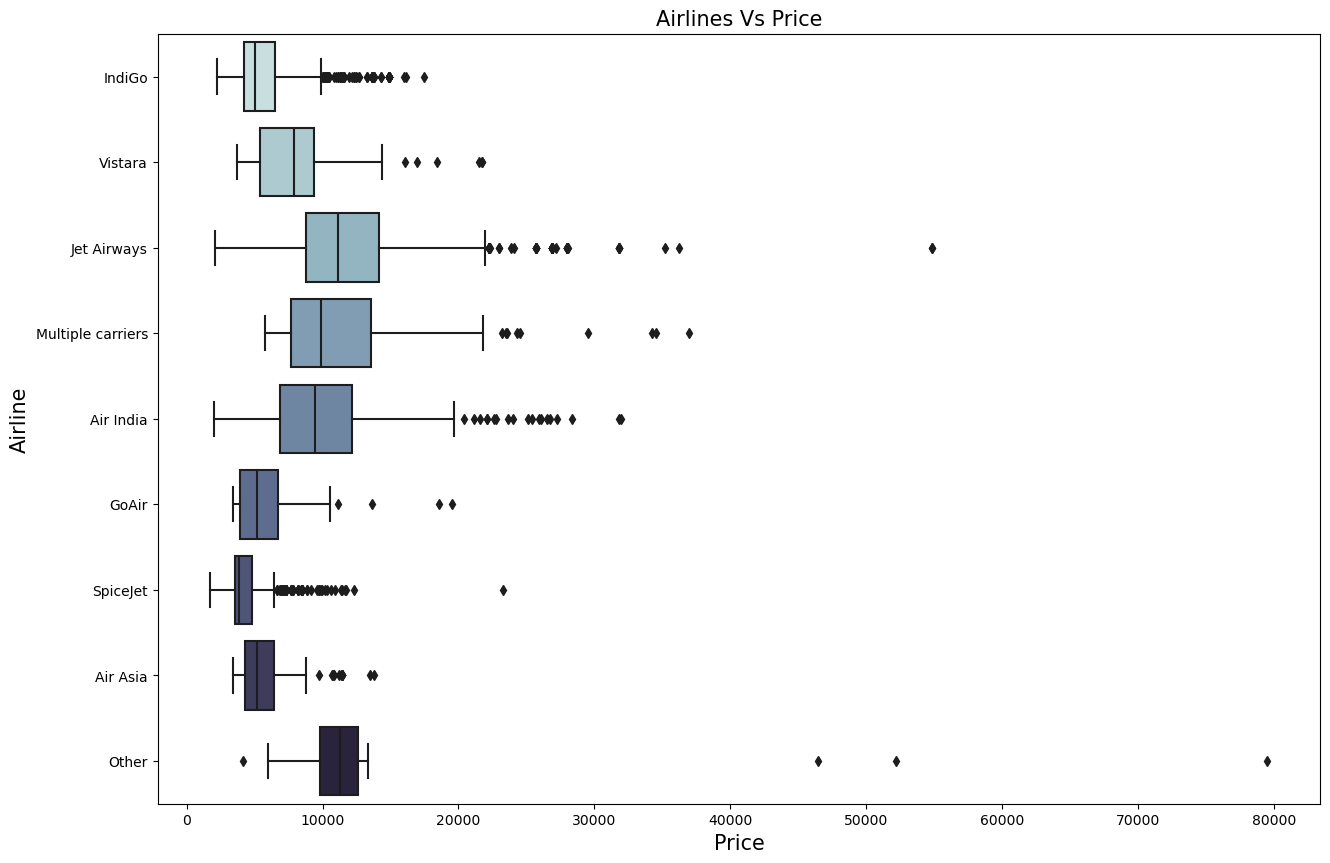

In [62]:
plt.figure(figsize=(15,10))
sns.boxplot(y=viz_df['Airline'],x=viz_df['Price'],palette='ch:start=.2,rot=-.3')
plt.title('Airlines Vs Price',fontsize=15)
plt.ylabel('Airline',fontsize=15)
plt.xlabel('Price',fontsize=15)
plt.show()

### <span style='color:#4c566a' >Does price vary with Airlines?</span>

- <font color='#5479a6'>As we can see 'Jet Airways Business' has Maximum Price range</font>
- <font color='#5479a6'>As we can see 'Trujet' has Minimum Price range</font>
- <font color='#5479a6'>'Jet Airways', 'Multiple carriers','Air India'have average range</font>

---

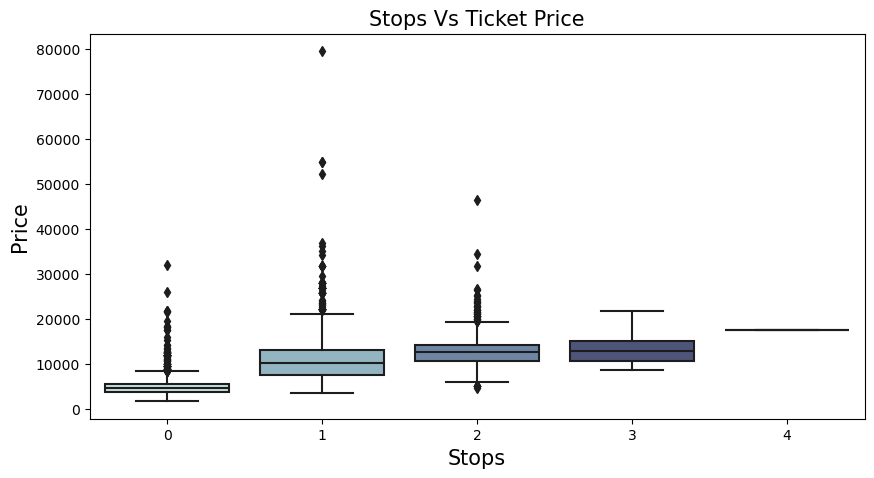

In [63]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Total_Stops',y='Price',data=viz_df,palette='ch:start=.2,rot=-.3')
plt.title('Stops Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

<Figure size 720000x360000 with 0 Axes>

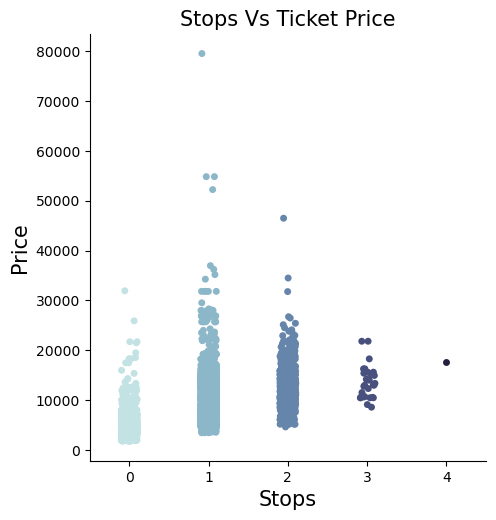

In [64]:
plt.figure(figsize=( 7200,3600))
sns.catplot(x='Total_Stops',y='Price',data=viz_df,palette='ch:start=.2,rot=-.3')
plt.title('Stops Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

### <span style='color:#4c566a' >How Does the Ticket Price vary with the number of stops of a Flight?</span>

- <font color='#5479a6'>Flights having one stop has maximum ticket price</font>

---

In [65]:
for i in range(len('Arrival_Time_hour')):
    hourr = df.loc[i,'Arrival_Time_hour']
    if (hourr >= 4) & (hourr <8):
        viz_df.loc[i,'Part_of_day'] = 'Early morning'
    elif (hourr >= 8) & (hourr <11):
        viz_df.loc[i,'Part_of_day'] = 'Morning'
    elif (hourr >= 11) & (hourr <12):
        viz_df.loc[i,'Part_of_day'] = 'Late morning'
    elif (hourr >= 12) & (hourr <13):
        viz_df.loc[i,'Part_of_day'] = 'Morning'
    elif (hourr >= 13) & (hourr <15):
        viz_df.loc[i,'Part_of_day'] = 'Early afternoon'
    elif (hourr >= 15) & (hourr <17):
        viz_df.loc[i,'Part_of_day'] = 'Late afternoon'
    elif (hourr >= 15) & (hourr <21):
        viz_df.loc[i,'Part_of_day'] = 'Evening'
    elif (hourr >= 21) & (hourr <=23):
        viz_df.loc[i,'Part_of_day'] = 'Night'
    elif (hourr >= 0) & (hourr <4):
        viz_df.loc[i,'Part_of_day'] = 'Mid-night'

In [66]:
for i in range(len('Dep_Time_hour')):
    hourr = df.loc[i,'Dep_Time_hour']
    if (hourr >= 4) & (hourr <8):
        viz_df.loc[i,'Part_of_day2'] = 'Early morning'
    elif (hourr >= 8) & (hourr <11):
        viz_df.loc[i,'Part_of_day2'] = 'Morning'
    elif (hourr >= 11) & (hourr <12):
        viz_df.loc[i,'Part_of_day2'] = 'Late morning'
    elif (hourr >= 12) & (hourr <13):
        viz_df.loc[i,'Part_of_day2'] = 'Morning'
    elif (hourr >= 13) & (hourr <15):
        viz_df.loc[i,'Part_of_day2'] = 'Early afternoon'
    elif (hourr >= 15) & (hourr <17):
        viz_df.loc[i,'Part_of_day2'] = 'Late afternoon'
    elif (hourr >= 15) & (hourr <21):
        viz_df.loc[i,'Part_of_day2'] = 'Evening'
    elif (hourr >= 21) & (hourr <=23):
        viz_df.loc[i,'Part_of_day2'] = 'Night'
    elif (hourr >= 0) & (hourr <4):
        viz_df.loc[i,'Part_of_day2'] = 'Mid-night'

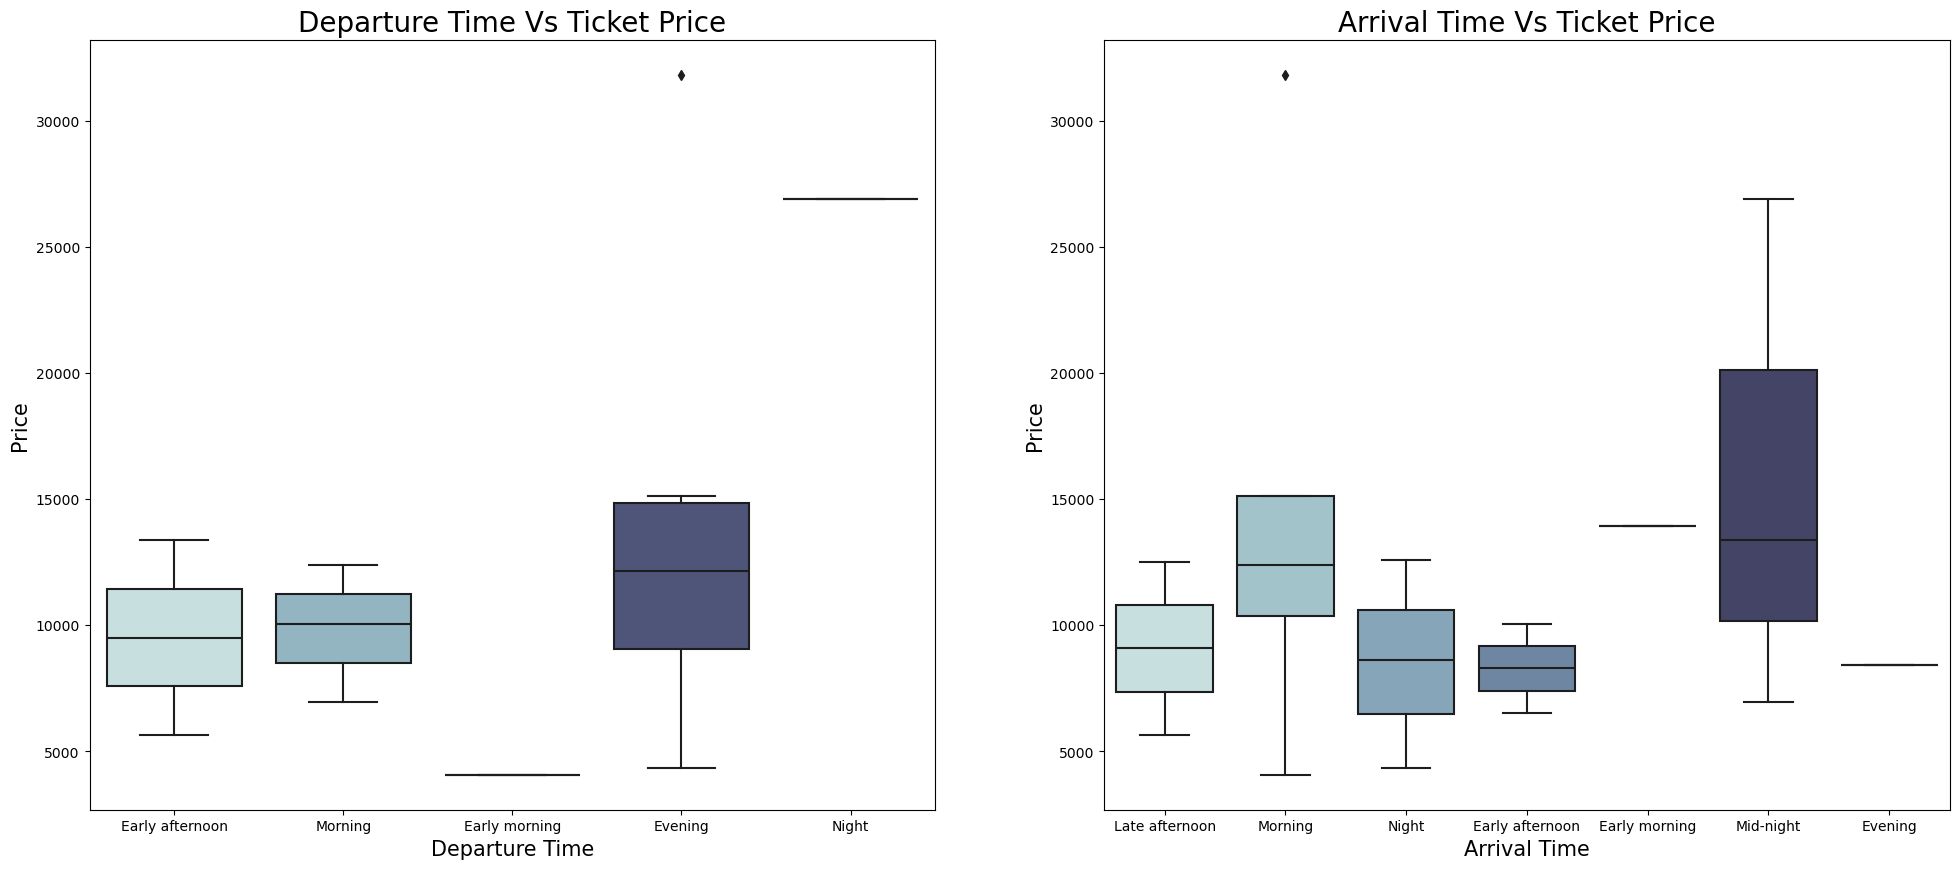

In [67]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='Part_of_day2',y='Price',data=viz_df,palette='ch:start=.2,rot=-.3')
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='Part_of_day',y='Price',data=viz_df,palette='ch:start=.2,rot=-.3')
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()


### <span style='color:#4c566a' >How the Ticket Price change based on the Departure Time and Arrival Time?</span>
 - <font color='#aa8464'>Departure Time Vs Ticket Price</font>
   - <font color='#5479a6'>Ticket Price is More when the Departure Time is at Night</font>
   - <font color='#5479a6'>Ticket Price is almost equal at Early afternoon and morning and slightly less than that at Evening</font>
   - <font color='#5479a6'>Ticket Price is Low at Early_morning</font>
 - <font color='#aa8464'>Arrival Time Vs Ticket Price</font>
   - <font color='#5479a6'>Ticket Price is More when the Arrival Time is at Mid-night</font>
   - <font color='#5479a6'>Ticket Price is almost equal at late afternoon , nigh, and Early afternoon</font> 
   - <font color='#5479a6'>Ticket Price is Low at late afternoon , nigh, and Early afternoon</font> 

---

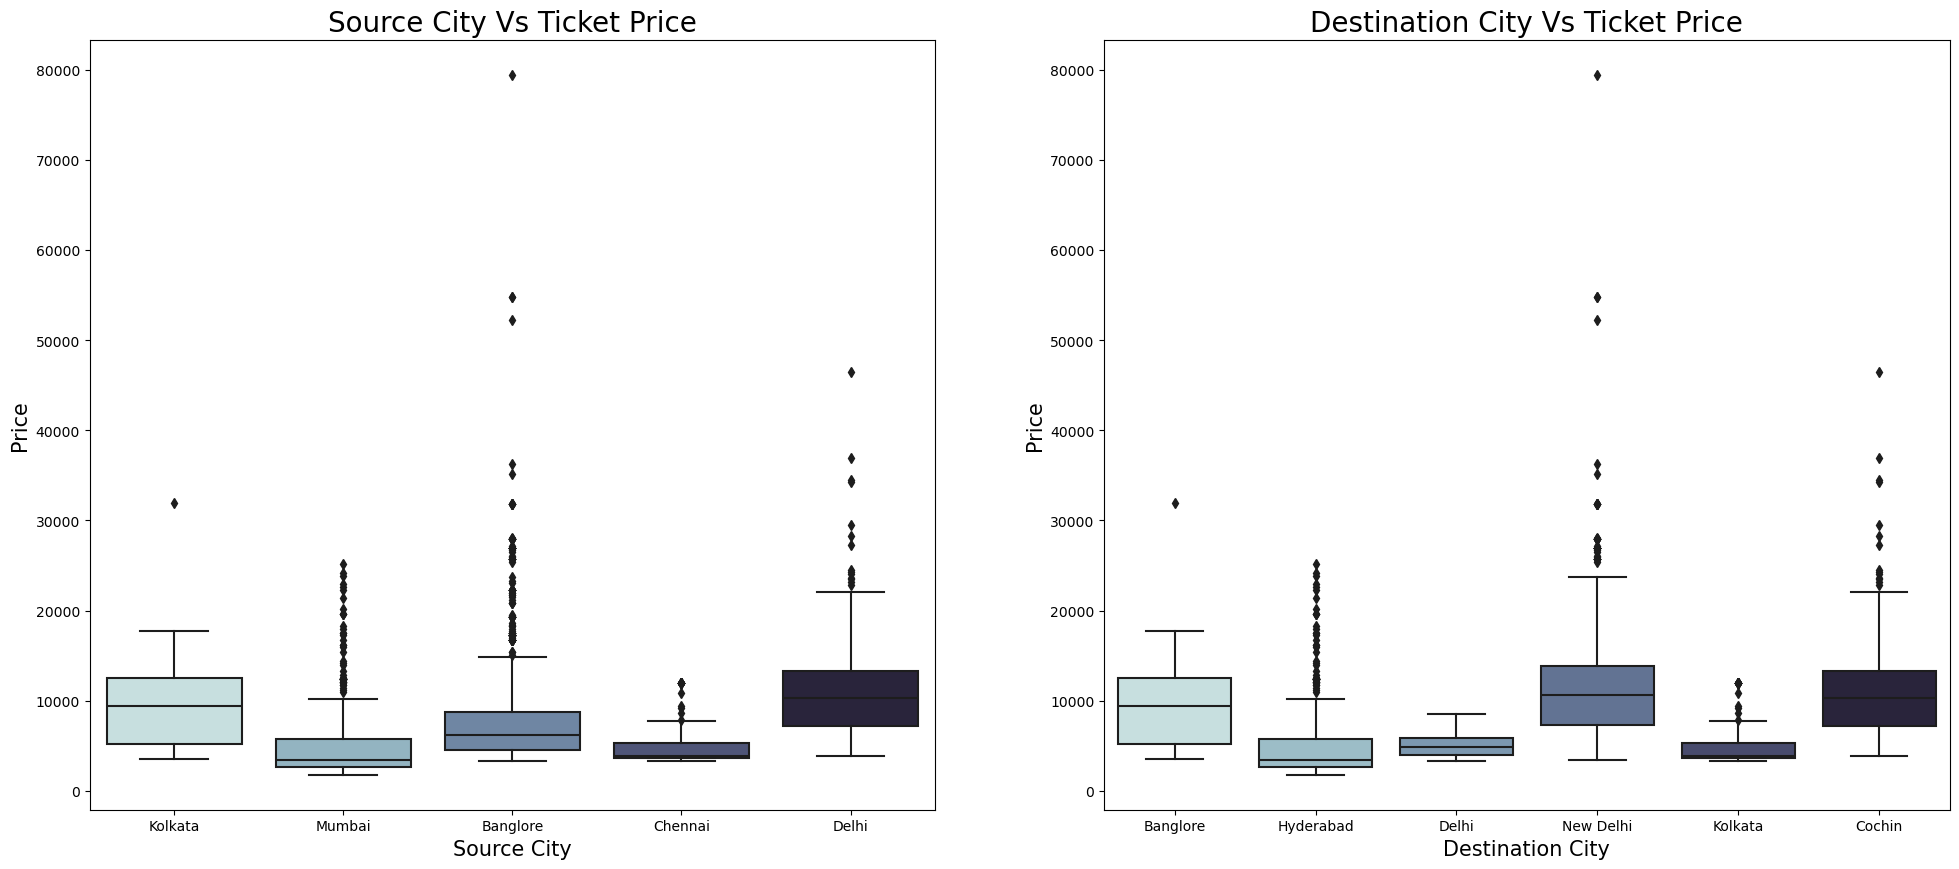

In [68]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='Source',y='Price',data=viz_df,palette='ch:start=.2,rot=-.3')
plt.title('Source City Vs Ticket Price',fontsize=20)
plt.xlabel('Source City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='Destination',y='Price',data=viz_df,palette='ch:start=.2,rot=-.3')
plt.title('Destination City Vs Ticket Price',fontsize=20)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

### <span style='color:#4c566a' > How the price changes with change in Source city and Destination city? </span>
 - <font color='#aa8464'>Source City Vs Ticket Price</font> 
   - <font color='#5479a6'>Ticket Price is More whose Source City is Kolkata and Delhi</font>
   - <font color='#5479a6'>Ticket Price is almost equal in chennai and Mumbai</font>
   - <font color='#5479a6'>Ticket Price is Low in Mumbai</font>
 - <font color='#aa8464'>Destination City Vs Ticket Price</font>
   - <font color='#5479a6'>Ticket Price is More whose Destination City is New Delhi</font>
   - <font color='#5479a6'>Ticket Price is almost equal in Delhi ,Hyderabad and Kolkata</font>
   - <font color='#5479a6'>Ticket Price is almost equal in Hyderabad and Bangalore</font>
   - <font color='#5479a6'>Ticket Price is Low in Hyderabad</font>

---

In [69]:
viz_df.groupby(['Source','Destination','Airline','Route'],as_index=False).count().groupby(['Source','Destination'],
as_index=False)['Route'].count().head(10)

,Source,Destination,Route
0,Banglore,Delhi,8
1,Banglore,New Delhi,54
2,Chennai,Kolkata,5
3,Delhi,Cochin,60
4,Kolkata,Banglore,56
5,Mumbai,Hyderabad,25


In [70]:
viz_df.groupby(['Airline','Source','Destination'],as_index=False)['Price'].mean().head(10)

,Airline,Source,Destination,Price
0,Air Asia,Banglore,Delhi,4329.641509
1,Air Asia,Banglore,New Delhi,5978.714286
2,Air Asia,Delhi,Cochin,7786.933333
3,Air Asia,Kolkata,Banglore,4968.416667
4,Air India,Banglore,Delhi,5984.964706
5,Air India,Banglore,New Delhi,10917.358491
6,Air India,Chennai,Kolkata,5595.750000
7,Air India,Delhi,Cochin,9996.666667
8,Air India,Kolkata,Banglore,10363.765172
9,Air India,Mumbai,Hyderabad,6322.706522


- ### <font color='#81a1c1'>Average Price of different Airlnes from Source city to Destination city</font>

---

### <span style='color:#20345a' >Dealing with Categorical Data</span>

In [71]:
df.drop('Route', axis=1,inplace=True)
df1.drop('Route', axis=1,inplace=True)
viz_df.drop('Route', axis=1,inplace=True)

In [72]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [73]:
def wait():
    pass
    for (col, typee) in zip(df.dtypes.index, df.dtypes):
        if typee == 'object':
            df[col] = le.fit_transform(df[col])

    #-------------------------------------------------------

    for (col, typee) in zip(df1.dtypes.index, df1.dtypes):
        if typee == 'object':
            df1[col] = le.fit_transform(df1[col])

In [74]:
for (col, typee) in zip(df.dtypes.index, df.dtypes):
        if typee == 'object':
            print(col, typee)

Duration object


In [75]:
df['Airline'].head()

0    1
1    5
2    1
3    5
4    1
Name: Airline, dtype: int64

---

### <font color='#4c566a'>Check For Outliers</font>

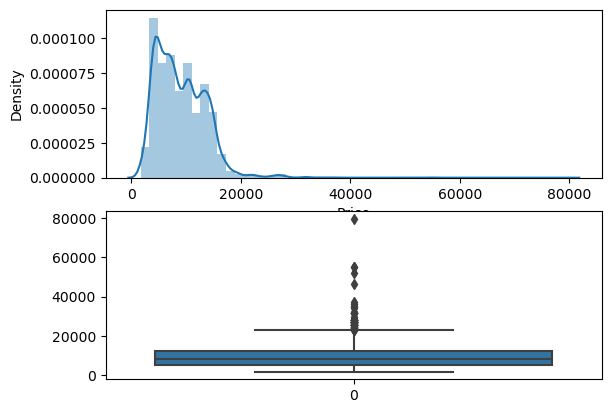

In [76]:
def plot(data,column):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[column],ax=ax1)
    sns.boxplot(data[column],ax=ax2)
plot(df,'Price')

### <font color='#4c566a'>Handling outliers:</font>


In [77]:
def treat_outliers(data,column):
    q1 = (np.percentile(data[column],25))
    q3 = (np.percentile(data[column],75))
    iqr = q3-q1
    minn = q1 - (1.5*iqr)
    maxx = q3 + (1.5*iqr)
    for i in range(len(data[column])):
        val = data.loc[i,column]
        if val < minn:
            data.loc[i,column] = minn
        if val > maxx:
            data.loc[i,column] = maxx

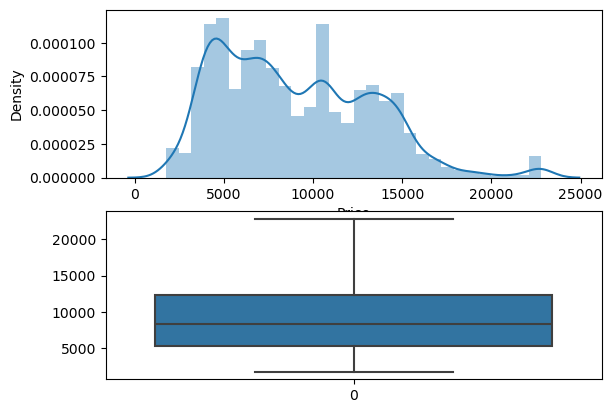

In [78]:
#df['Price']=np.where(df['Price']>=40000,df['Price'].median(),df['Price'])
treat_outliers(df,'Price')
plot(df,'Price')

---

In [79]:
df = df.drop(['Duration_hour', 'Duration_minute', 'Duration'], axis=1)
df1 = df1.drop(['Duration_hour', 'Duration_minute', 'Duration'], axis=1)

---

In [80]:
# independant variables
X = df.drop(['Price'], axis=1)
y = df['Price']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [83]:
reg_rf = RandomForestRegressor(random_state=42, n_estimators=220, max_depth=20)
reg_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=220, random_state=42)

In [84]:
#y_pred_val_rf = reg_rf.predict(X_test)
y_pred = reg_rf.predict(X_test)

In [85]:
reg_rf.score(X_train, y_train)

0.9846963729992775

In [86]:
reg_rf.score(X_test, y_test)

0.9056818906891428

In [87]:
reg_rf.score(X_train, y_train)

0.9846963729992775

In [88]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [89]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 694.5866844395562
MSE: 1733030.0937320965
RMSE: 1316.4460086657928


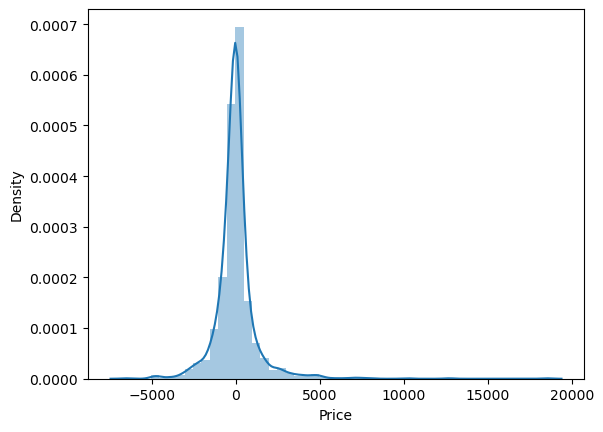

In [90]:
sns.distplot(y_test-y_pred)
plt.show()

In [91]:
y_test_pred_final = reg_rf.predict(df1)

In [92]:
y_test_pred_final = pd.DataFrame(y_test_pred_final)

In [93]:
y_test_pred_final.to_csv('y_test_pred_final.csv')

### <span style='color:#4c566a' >Hyper Tuning the model</span>

In [94]:
from sklearn.model_selection import RandomizedSearchCV

In [95]:
random_grid = {
    'n_estimators' : [100, 120, 150, 180, 200,220],
    'max_features':['auto','sqrt'],
    'max_depth':[5,10,15,20],
    }

In [96]:
rf=RandomForestRegressor()
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1,)

rf_random.fit(X_train,y_train)

# best parameter
rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 20}

In [97]:
rf_random.best_params_

{'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 20}

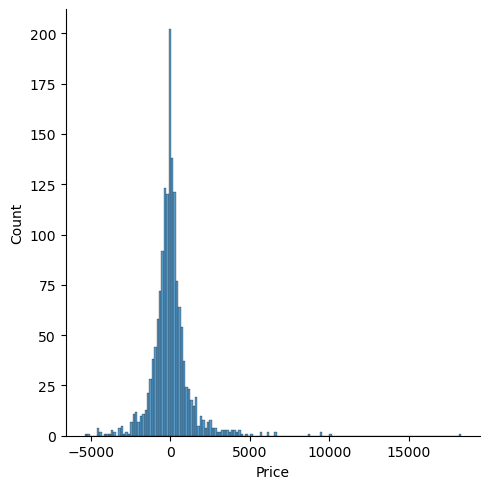

In [98]:
#predicting the values
prediction = rf_random.predict(X_test)

#distribution plot between actual value and predicted value
sns.displot(y_test-prediction)

### <font color='#4c566a'>Summary</font>


### <span style='color:#4c566a' >Analysis and Results:</span>

- Selected features are:
  - Source (4 Sources were selected for this project)
  - Destination (4 Destinations were selected for this project)
  - Total Stops
  - Average Price per Airline
  - Duration
  - Price (Target)

### <span style='color:#4c566a' >Project Various Step</span>

- Data Exploration
 - I started exploring datasets using pandas, NumPy,matplotlib and seaborn.


- Data cleaning.


- Data visualization
 - Ploted Prices with different features.
 - Made chats like( Bocxplot,countplot).


- Model Selection
 - Made many Models But selected RandomForest Regressor.


- Hyperparameter Optimization
 - Using Randomizedsearch CV to select the best parameter for training the mode

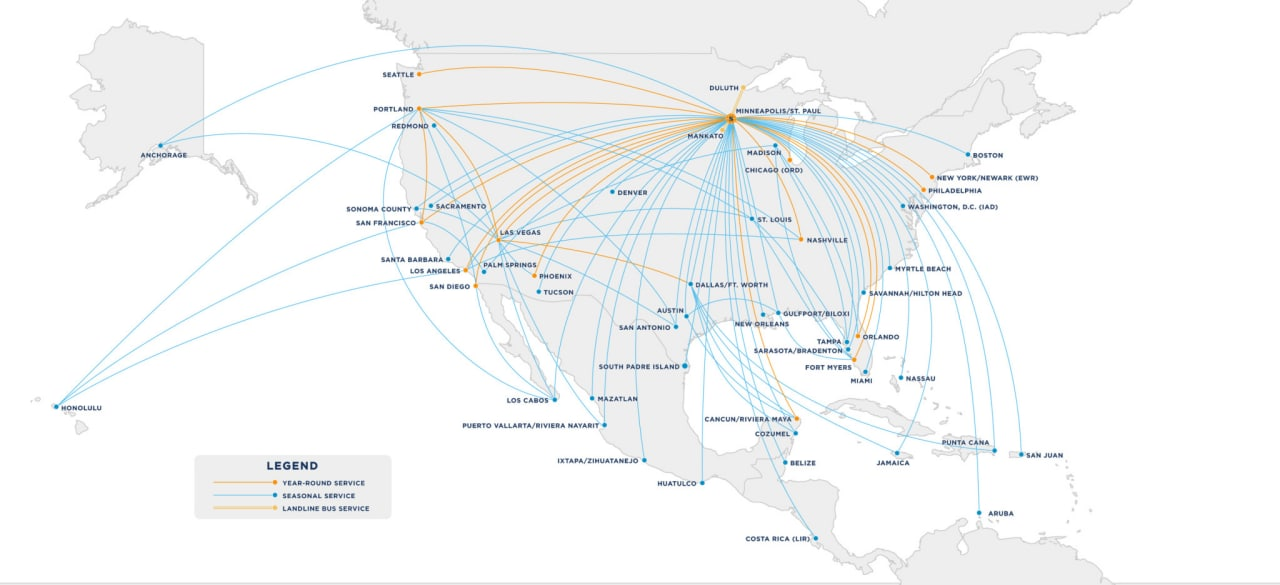